Este trabalho está baseado num subgrafo da rede descrita no site:

https://snap.stanford.edu/data/com-Amazon.html

Dito subgrafo é descrito pelas arestas no arquivo amazon.txt. As comunidades conhecidas da rede são apresentadas no arquivo amazon-coms.txt (uma comunidade por linha).
1. Realize uma análise do subgrafo usando as métricas globais e locais que considere convenientes.

2. Utilize pelo menos dois algoritmos para achar uma partição do subgrafo em comunidades. Justifique a escolha de cada algoritmo utilizado. Compare os resultados.

3. Avalie as partições achadas.

4. Compare as partições achadas com as comunidades predefinidas.

5. As comunidades predefinidas correspondem-se com uma partição da rede? No caso que não seja uma partição, propunha uma maneira de criar uma partição baseada nas comunidades. Avalie a partição resultante.

6. Escreva um relatório com os resultados. Inclua o código de Python.

Ao iniciarmos nossa análise vamos carregar as nossas bibliotecas.

In [1]:
%load_ext autoreload
%autoreload 2

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from plot import *

Irei agora inicializar a rede com os dados do arquivo `amazon.txt`. Essa rede é construída a partir de compras na amazon, se dois sítios `i` e `j` estão conectados é porque houve uma compra na qual os dois produtos estavam presentes. Essa forma como foi construída a rede é importante para entendermos os parâmetros locais e globais da rede.

In [3]:
rede = np.loadtxt('amazon.txt')
G = nx.DiGraph()
for i in rede:
    G.add_edge(i[0],i[1])

Agora iremos avaliar algumas métricas. Percebe-se que temos uma rede muito pouco densa, é bastante comum fazer pedidos com pouca quantidade de produtos, ainda mais quanto mais caro for o produto, portanto acaba que essa rede se torna muito pouco densa. Porém nota-se que o menor caminho médio também é pequeno, isso mostra que os compradores tendem a comprar vários tipos de produtos diferentes, possibilitando que se locomova com facilidade na rede. Além disso, o Agrupamento total nos dá uma probabilidade de 12% de termos tripla, ou seja se uma pessoa compra computador e mouse e outra compra computador e teclado, a probabilidade de ela levar os 3 é de 12%.

In [4]:
print('A densidade da rede é de: {densidade:.6f}'.format(densidade = nx.density(G)))
print('O menor caminho médio da rede é de: {densidade:.6f}'.format(densidade = nx.average_shortest_path_length(G)))
print('O Agrupamento Total da rede é de: {densidade:.6f}'.format(densidade = nx.transitivity(G)))

A densidade da rede é de: 0.000038
O menor caminho médio da rede é de: 0.000745
O Agrupamento Total da rede é de: 0.120627


Por fim notamos que a rede segue uma lei de potência com coeficiente -3.65. Ou seja, muitos sítios têm entre 1 a 3 conexões, enquanto que pouquíssimos têm 10 ou mais. Isso concorda com o que falamos anteriormente, é muito raro alguém ter dinheiro suficiente para comprar 10 produtos diferentes ou mais, apenas se tiverem um preço razoável, mas grande parte ainda faz pequenas compras.

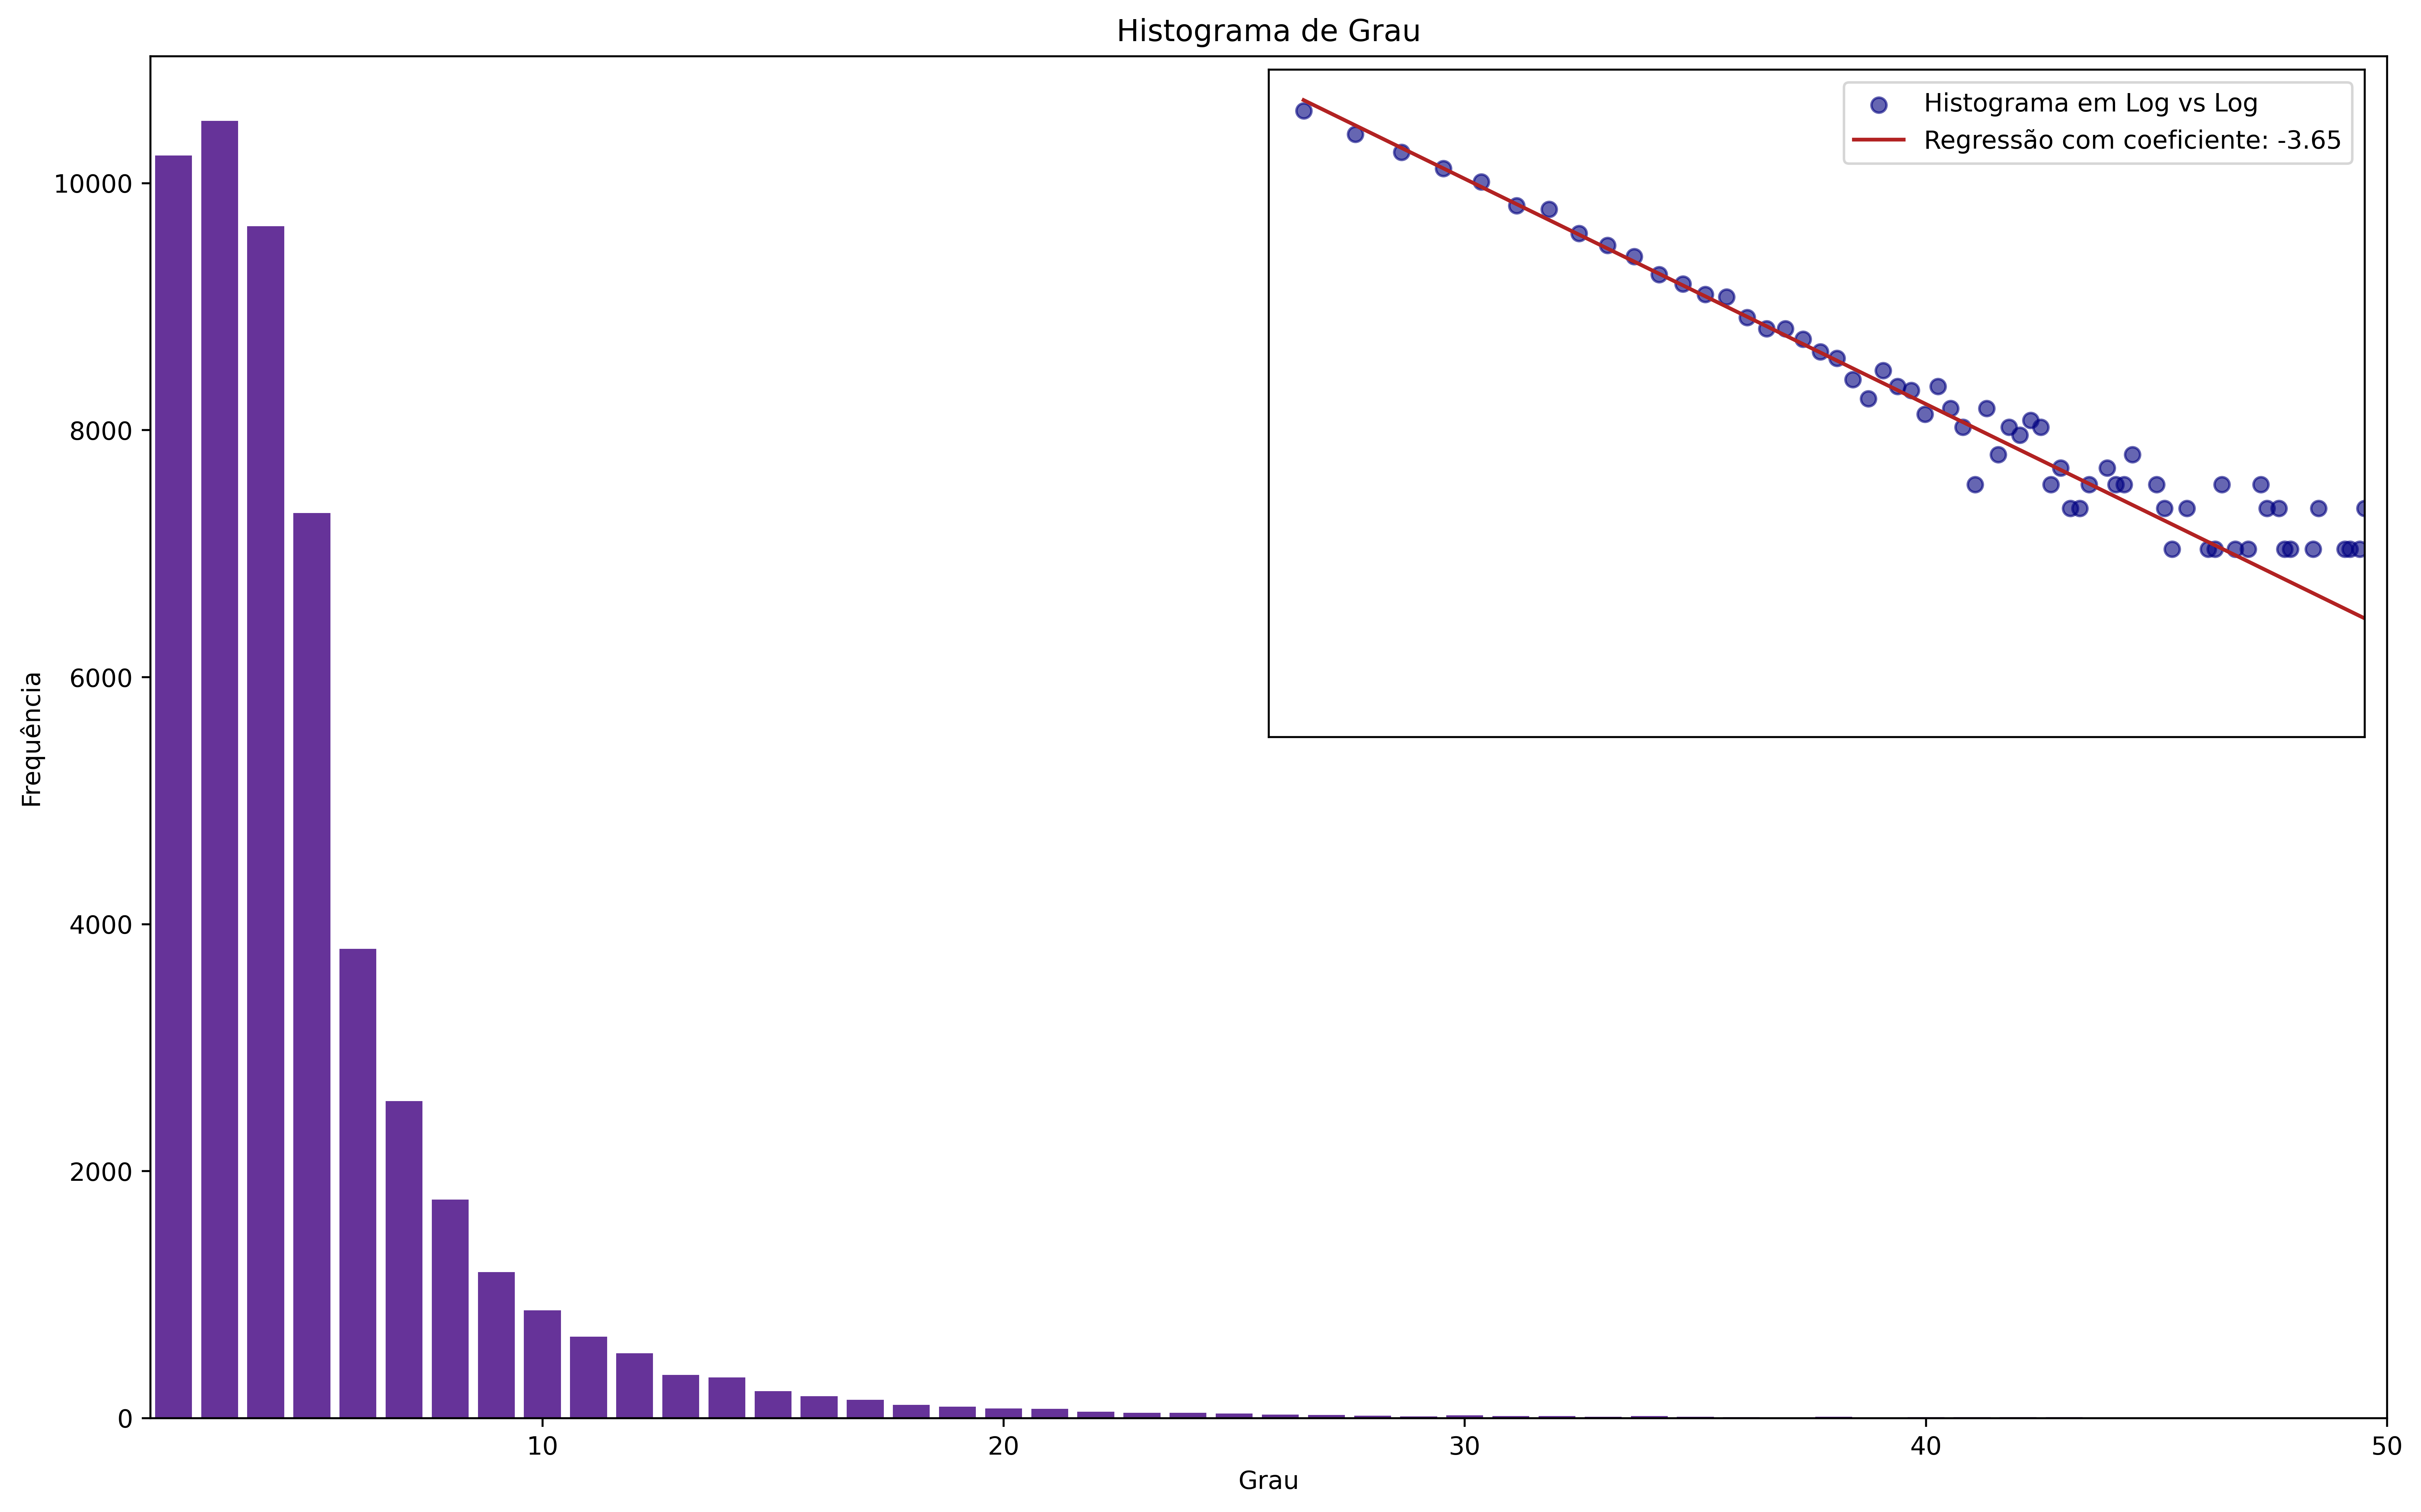

In [5]:
degree_graph(G)

Para separar nossa rede em comunidades será utilizado dois algoritmos: Modularidade. No algoritmo de modularidade, cada sítio da rede é um cluster dele mesmo e juntamos aqueles sítios na qual maximiza a modularidade que é calculada como:

$$
\begin{equation}
M(G) = \frac{1}{2m}\sum_{k_1,k_2 \in V}(A(k_1,k_2) - \frac{d(k_1)d(k_2)}{2m})\delta(k_1,k_2)
\end{equation}
$$

In [13]:
greedy = greedy_algorithm(G)

Aqui o `networkx` já consegue gerar os algoritmos porém para deixar mais prático está tudo salvo em um arquivo json. O algoritmo greedy mostra m324 comunidades em ordem decrescente de tamanho sendo as menores de tamanho de 4 sítios.

Ao analisarmos os resultados dos algoritmos com o arquivo `amazon-coms.txt` temos uma diferença gritante, isso acontece porque o que está dentro desse arquivo não são partições. Existem sítios que estão em diferentes comunidades, de acordo com o arquivo, isso não acontece ao rodar os algoritmos. O que o arquivo contêm são os departamentos de cada objeto, por exemplo, Brinquedo, automotivo, tecnologia e é possível que um objeto percença a mais de um. O que o algoritmo separa é em uma coisa diferente, por exemplo, os livros da saga Harry Potter comumente são vendidos em blocos, pois a pessoa vai querer comprar as continuações do livro 3 ou do 1. Portanto isso é o que o nosso algoritmo acaba detectando.